<a href="https://colab.research.google.com/github/mickdapoot/Flowise/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Total Cost of Ownership (TCO) Calculator

created by @rUv, cause he could.

Welcome to the LLM TCO Calculator, a dynamic tool designed to help users estimate the total cost of ownership for various Large Language Models (LLMs) based on their unique usage parameters. This calculator provides an intuitive interface for selecting a model, specifying input parameters, and instantly viewing an estimate of the total token costs and the monthly deployment costs associated with the chosen model.

## Key Features:
- **Model Selection**: Choose from a wide range of popular LLMs, including GPT-4, Claude, PaLM 2, and more, each with their distinct pricing structures.
- **Customizable Parameters**: Specify the number of input and output tokens, daily request volumes, and operational days per month to tailor the calculation to your specific use case.
- **Real-Time Cost Estimations**: As you adjust the input parameters, the calculator automatically updates to provide immediate feedback on the total token cost and estimated monthly deployment cost.
- **User-Friendly Interface**: The calculator is built with an easy-to-navigate interface, ensuring a seamless user experience without the need for extensive technical knowledge.

## Visualizations

Visualizing the total cost of ownership (TCO) for various Large Language Models (LLMs) can significantly aid in decision-making. By graphically comparing the estimated monthly deployment costs across different models, stakeholders can quickly identify the most cost-effective solutions for their needs.

Whether you're budgeting for a new project, comparing the costs of different models, or simply exploring the financial implications of deploying an LLM, this calculator offers valuable insights to inform your decision-making process.

In [ ]:
#install the requirements
!pip install pyyaml toml
!pip install plotly

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import json

# Pricing per 1 million tokens, converted to per-token cost
model_pricing = {
    'GPT-4': {'input_cost': 30.00 / 1e6, 'output_cost': 60.00 / 1e6},
    'GPT-4 32K': {'input_cost': 60.00 / 1e6, 'output_cost': 120.00 / 1e6},
    'GPT-4 Turbo': {'input_cost': 10.00 / 1e6, 'output_cost': 30.00 / 1e6},
    'GPT-3.5 Instruct': {'input_cost': 1.50 / 1e6, 'output_cost': 2.00 / 1e6},
    'GPT-3.5': {'input_cost': 0.50 / 1e6, 'output_cost': 1.50 / 1e6},
    'Claude 3 Opus': {'input_cost': 15.00 / 1e6, 'output_cost': 75.00 / 1e6},
    'Claude 2': {'input_cost': 8.00 / 1e6, 'output_cost': 24.00 / 1e6},
    'Claude 3 Sonnet': {'input_cost': 3.00 / 1e6, 'output_cost': 15.00 / 1e6},
    'Claude Instant': {'input_cost': 0.80 / 1e6, 'output_cost': 2.40 / 1e6},
    'Claude 3 Haiku': {'input_cost': 0.25 / 1e6, 'output_cost': 1.25 / 1e6},
    'PaLM 2': {'input_cost': 0.33 / 1e6, 'output_cost': 0.65 / 1e6},
    'Gemini Pro': {'input_cost': 0.17 / 1e6, 'output_cost': 0.49 / 1e6},
    'Gemini Pro Vision': {'input_cost': 0.17 / 1e6, 'output_cost': 0.49 / 1e6},
    'Mistral 8x7B Instruct': {'input_cost': 0.36 / 1e6, 'output_cost': 0.36 / 1e6},
    'Mistral 7B Instruct': {'input_cost': 0.17 / 1e6, 'output_cost': 0.17 / 1e6},
    'Llama-2 70B Chat': {'input_cost': 0.91 / 1e6, 'output_cost': 1.17 / 1e6},
    'Code Llama': {'input_cost': 0.78 / 1e6, 'output_cost': 0.78 / 1e6},
    'Llama-2 13B Chat': {'input_cost': 0.29 / 1e6, 'output_cost': 0.29 / 1e6}
}


# Set the width of the description to ensure titles are fully visible
style = {'description_width': 'initial'}

# Create widgets for model selection and input parameters
model_selector = widgets.Dropdown(options=list(model_pricing.keys()), value='GPT-4', description='Model:', style={'description_width': 'initial'})
input_tokens = widgets.FloatText(value=1000, description='Input Tokens:', style={'description_width': 'initial'})
output_tokens = widgets.FloatText(value=1000, description='Output Tokens:', style={'description_width': 'initial'})
requests_per_day = widgets.FloatText(value=1000, description='Requests per Day:', style={'description_width': 'initial'})
days_per_month = widgets.FloatText(value=30, description='Days per Month:', style={'description_width': 'initial'})

# Initialize output widgets for displaying calculated costs
total_token_cost = widgets.FloatText(value=0, description='Total Token Cost:', disabled=True, style={'description_width': 'initial'})
deployment_cost = widgets.FloatText(value=0, description='Deployment Cost:', disabled=True, style={'description_width': 'initial'})

# Function to calculate and update cost information
def calculate_and_display_costs(change):
    pricing = model_pricing[model_selector.value]
    input_cost = pricing['input_cost'] * input_tokens.value
    output_cost = pricing['output_cost'] * output_tokens.value
    total_cost = input_cost + output_cost
    monthly_deployment_cost = total_cost * requests_per_day.value * days_per_month.value

    total_token_cost.value = total_cost
    deployment_cost.value = monthly_deployment_cost

    with output_area:
        clear_output(wait=True)
        print(f"Selected Model: {model_selector.value}")
        print(f"Input Tokens: {input_tokens.value}, Output Tokens: {output_tokens.value}")
        print(f"Total Token Cost: ${total_token_cost.value:.2f}")
        print(f"Estimated Deployment Cost per Month: ${deployment_cost.value:.2f}")

# Create an output area for displaying results
output_area = widgets.Output()

# Display the UI elements
ui = widgets.VBox([
    model_selector,
    input_tokens,
    output_tokens,
    requests_per_day,
    days_per_month,
    total_token_cost,
    deployment_cost,
    output_area
])
display(ui)

# Register event handlers to recalculate and display costs whenever any input changes
model_selector.observe(calculate_and_display_costs, names='value')
input_tokens.observe(calculate_and_display_costs, names='value')
output_tokens.observe(calculate_and_display_costs, names='value')
requests_per_day.observe(calculate_and_display_costs, names='value')
days_per_month.observe(calculate_and_display_costs, names='value')

# Initial calculation and display
calculate_and_display_costs(None)


In [ ]:
def calculate_costs():
    # Retrieve the selected model's pricing details
    pricing = model_pricing[model_selector.value]
    input_cost_per_token = pricing['input_cost']
    output_cost_per_token = pricing['output_cost']

    # Calculate total costs based on the number of tokens and the model's per-token pricing
    total_input_cost = input_cost_per_token * input_tokens.value
    total_output_cost = output_cost_per_token * output_tokens.value

    # Calculate the average cost per token, total token cost, and deployment cost
    average_cost_per_token = (total_input_cost + total_output_cost) / (input_tokens.value + output_tokens.value)
    total_token_cost = total_input_cost + total_output_cost
    deployment_cost = total_token_cost * requests_per_day.value * days_per_month.value

    # Format the calculated values for display
    formatted_input_cost = format_float(total_input_cost)
    formatted_output_cost = format_float(total_output_cost)
    formatted_average_cost_per_token = format_float(average_cost_per_token)
    formatted_total_token_cost = format_float(total_token_cost)
    formatted_deployment_cost = format_float(deployment_cost)

    # Display the formatted values
    print(f"The AI model selected for the cost analysis is: {model_selector.value}.")
    print(f"Total cost for the specified input tokens: ${formatted_input_cost}.")
    print(f"Total cost for the specified output tokens: ${formatted_output_cost}.")
    print(f"Average cost per token: ${formatted_average_cost_per_token}.")
    print(f"Total cost for the tokens (input + output): ${formatted_total_token_cost}.")
    print(f"Estimated deployment cost per month: ${formatted_deployment_cost}.")

calculate_costs()


The AI model selected for the cost analysis is: Claude 3 Opus.
Total cost for the specified input tokens: $0.02.
Total cost for the specified output tokens: $0.07.
Average cost per token: $0.00.
Total cost for the tokens (input + output): $0.09.
Estimated deployment cost per month: $2700.00.


# Output Formats

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import toml
import yaml
import csv
from io import StringIO

# Assuming the creation and initialization of widgets model_selector, input_tokens, output_tokens, requests_per_day, days_per_month, cost_per_token_input, cost_per_token_output
# For the sake of this example, these should already be defined and initialized based on user input in your environment

# Helper function to format the float values as strings with two decimal places.
format_float = lambda x: f"{x:.2f}"

def get_analysis_output():
    # Retrieve values and format them for display, assuming widgets are defined and hold the latest values
    analysis_output = {
        "model_selected": model_selector.value,
        "input_tokens": format_float(input_tokens.value),
        "output_tokens": format_float(output_tokens.value),
        "daily_requests": format_float(requests_per_day.value),
        "operational_days_per_month": format_float(days_per_month.value),
        "cost_per_input_token": format_float(cost_per_token_input.value * input_tokens.value),
        "cost_per_output_token": format_float(cost_per_token_output.value * output_tokens.value),
        "total_token_cost": format_float((cost_per_token_input.value + cost_per_token_output.value) * (input_tokens.value + output_tokens.value)),
        "estimated_monthly_deployment_cost": format_float(requests_per_day.value * days_per_month.value * (cost_per_token_input.value + cost_per_token_output.value) * (input_tokens.value + output_tokens.value)),
    }
    return analysis_output

# Function to display the analysis output based on the selected format
def display_formatted_output(change):
    analysis_output = get_analysis_output()
    format_selector_value = change['new']

    if format_selector_value == 'JSON':
        formatted_output = json.dumps(analysis_output, indent=4)
    elif format_selector_value == 'TOML':
        formatted_output = toml.dumps(analysis_output)
    elif format_selector_value == 'YAML':
        formatted_output = yaml.dump(analysis_output)
    elif format_selector_value == 'CSV':
        output = StringIO()
        writer = csv.writer(output)
        for key, value in analysis_output.items():
            writer.writerow([key, value])
        formatted_output = output.getvalue()
    else:
        formatted_output = "Format not supported"

    with output_area:
        clear_output(wait=True)
        print(formatted_output)

# Setup the format selector
format_selector = widgets.Dropdown(
    options=['JSON', 'TOML', 'YAML', 'CSV'],
    value='JSON',
    description='Output Format:',
)

# Output area for displaying formatted analysis
output_area = widgets.Output()

# Display the widgets
display(format_selector, output_area)

# Initial display
display_formatted_output({'new': format_selector.value})

# Set up the event handler to update the output when the selection changes
format_selector.observe(display_formatted_output, names='value')


Dropdown(description='Output Format:', options=('JSON', 'TOML', 'YAML', 'CSV'), value='JSON')

Output()

## Visualizations for LLM TCO Calculator

In the LLM TCO (Total Cost of Ownership) Calculator, visualizations play a crucial role in conveying the comparative costs of deploying various Large Language Models (LLMs) effectively. Through the use of bar charts, users can easily grasp the estimated deployment costs associated with each model, making it simpler to make informed decisions.

The visualization segment of the calculator specifically targets the deployment cost per month for each model under consideration. Given a set of fixed inputs, such as the number of input and output tokens, daily requests, and operational days per month, the calculator computes the deployment costs. These costs are then plotted in a horizontal bar chart, providing a clear, comparative view across different models.

This approach not only aids in understanding the cost implications at a glance but also highlights the cost-effectiveness of certain models over others based on the user's specific usage patterns. The bar chart is interactive, displaying the exact monthly cost for each model when hovered over or selected. This feature ensures that users have all the necessary information to weigh the pros and cons of different LLMs based on cost, thereby aiding in the selection process of the most suitable model for their needs.

Such visualizations are indispensable in the TCO calculator, enhancing user experience and decision-making processes by presenting complex data in an accessible and understandable manner.


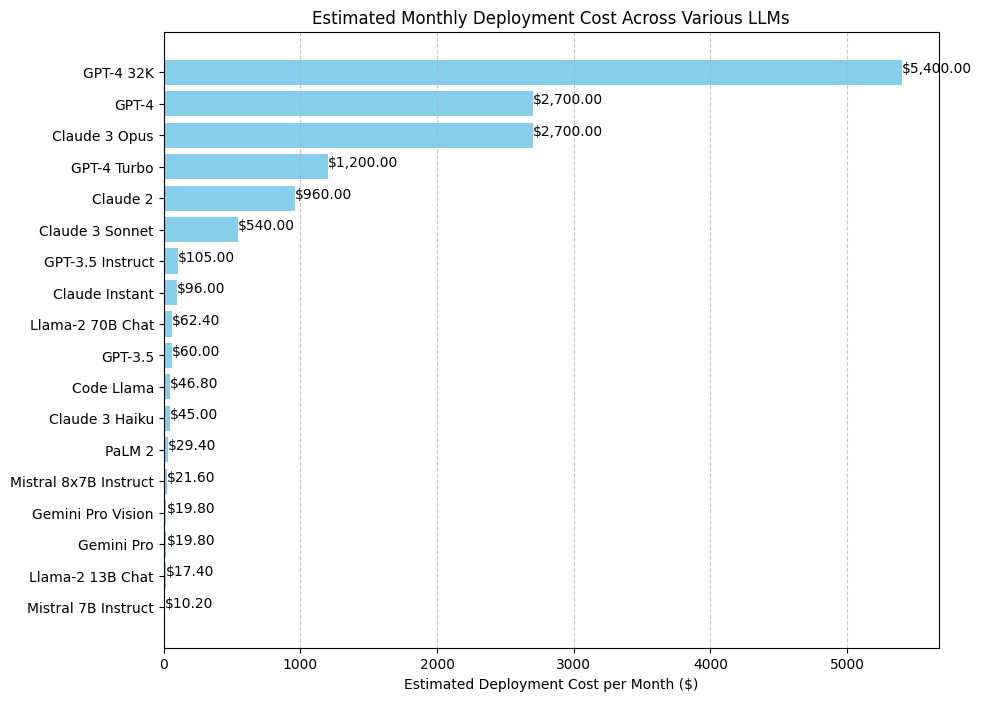

In [ ]:
# Assuming fixed inputs for the calculation
input_tokens = 1000
output_tokens = 1000
requests_per_day = 1000
days_per_month = 30

# Calculate the estimated deployment cost per month for each model
deployment_costs = {
    model: (pricing['input_cost'] * input_tokens + pricing['output_cost'] * output_tokens)
    * requests_per_day * days_per_month
    for model, pricing in model_pricing.items()
}

# Sort the models by deployment cost
sorted_models_by_cost = sorted(deployment_costs, key=deployment_costs.get)

# Prepare data for the bar chart
models = [model for model in sorted_models_by_cost]
costs = [deployment_costs[model] for model in sorted_models_by_cost]

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.barh(models, costs, color='skyblue')
plt.xlabel('Estimated Deployment Cost per Month ($)')
plt.title('Estimated Monthly Deployment Cost Across Various LLMs')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the values on the bars
for index, value in enumerate(costs):
    plt.text(value, index, f"${value:,.2f}")

plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming deployment_costs contains your calculated costs
df = pd.DataFrame(list(deployment_costs.items()), columns=['Model', 'Monthly Deployment Cost'])

# Generate a bar chart
fig = px.bar(df, x='Model', y='Monthly Deployment Cost', title='Monthly Deployment Cost by Model')
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming fixed inputs for the calculation from your setup
input_tokens = 1000
output_tokens = 1000
requests_per_day = 1000
days_per_month = 30

# Calculate the estimated deployment cost per month for each model
deployment_costs = {
    model: (pricing['input_cost'] * input_tokens + pricing['output_cost'] * output_tokens)
    * requests_per_day * days_per_month
    for model, pricing in model_pricing.items()
}

# Convert to DataFrame for Plotly
df_costs = pd.DataFrame(list(deployment_costs.items()), columns=['Model', 'Estimated Deployment Cost per Month'])

# Create the bar chart using Plotly Express
fig = px.bar(df_costs.sort_values('Estimated Deployment Cost per Month'),
             x='Estimated Deployment Cost per Month', y='Model', orientation='h',
             color='Estimated Deployment Cost per Month',
             color_continuous_scale='Blues',
             title='Estimated Monthly Deployment Cost Across Various LLMs')

# Customize the layout
fig.update_layout(xaxis_title='Estimated Deployment Cost per Month ($)',
                  yaxis_title='Model',
                  coloraxis_showscale=False)

# Show plot
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming fixed inputs for the calculation
input_tokens = 1000
output_tokens = 1000
requests_per_day = 1000
days_per_month = 30

# Calculate the estimated deployment cost per month for each model
deployment_costs = {
    model: (pricing['input_cost'] * input_tokens + pricing['output_cost'] * output_tokens)
    * requests_per_day * days_per_month
    for model, pricing in model_pricing.items()
}

# Convert the calculated deployment costs into a DataFrame
df_deployment_costs = pd.DataFrame(list(deployment_costs.items()), columns=['Model', 'Monthly Deployment Cost'])

# Sort the DataFrame by 'Monthly Deployment Cost' for better visualization
df_deployment_costs = df_deployment_costs.sort_values(by='Monthly Deployment Cost')

# Generate a bar chart using Plotly Express
fig = px.bar(df_deployment_costs, x='Model', y='Monthly Deployment Cost',
             title='Estimated Monthly Deployment Cost Across Various LLMs',
             color='Monthly Deployment Cost', color_continuous_scale=px.colors.sequential.Viridis)

# Customize the chart layout
fig.update_layout(xaxis_title='Model',
                  yaxis_title='Estimated Deployment Cost per Month ($)',
                  coloraxis_showscale=True)

# Display the chart
fig.show()


In [ ]:
# Example 2: Pie Chart Visualization
import plotly.express as px
import pandas as pd
# Ensure model_pricing is defined as per your setup

# Assuming fixed inputs for the calculation
input_tokens = 1000
output_tokens = 1000
requests_per_day = 1000
days_per_month = 30

# Calculate the estimated deployment cost per month for each model
deployment_costs = {
    model: (pricing['input_cost'] * input_tokens + pricing['output_cost'] * output_tokens)
    * requests_per_day * days_per_month
    for model, pricing in model_pricing.items()
}

# Convert the calculated deployment costs into a DataFrame for visualization
df_deployment_costs = pd.DataFrame(list(deployment_costs.items()), columns=['Model', 'Monthly Deployment Cost'])

# Generate a pie chart using Plotly Express
fig = px.pie(df_deployment_costs, names='Model', values='Monthly Deployment Cost',
             title='Cost Distribution Among Models',
             color_discrete_sequence=px.colors.sequential.RdBu)

# Customize the chart layout for better readability
fig.update_traces(textposition='inside', textinfo='percent+label')

# Display the chart
fig.show()



In [ ]:
import plotly.express as px
import pandas as pd

# Assuming the initial deployment costs calculation is in place
initial_deployment_costs = {
    model: (pricing['input_cost'] * input_tokens + pricing['output_cost'] * output_tokens)
    * requests_per_day * days_per_month
    for model, pricing in model_pricing.items()
}

# Simulate a 5% monthly increase in deployment costs
months = ["January", "February", "March"]
growth_rate = 0.05
models = list(model_pricing.keys())

# Prepare data with temporal dimension
data = {'Month': months}
for model in models:
    monthly_costs = [initial_deployment_costs[model]]
    for i in range(1, len(months)):
        # Increase by 5% from the previous month
        monthly_costs.append(monthly_costs[i-1] * (1 + growth_rate))
    data[model] = monthly_costs

df = pd.DataFrame(data)

# Melt the DataFrame for Plotly Express
df_melted = df.melt(id_vars=["Month"], var_name="Model", value_name="Deployment Cost")

# Generate a line chart
fig = px.line(df_melted, x='Month', y='Deployment Cost', color='Model',
              title='Simulated Monthly Deployment Costs Over Time',
              markers=True, labels={"Deployment Cost": "Estimated Deployment Cost ($)"})

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming data preparation as before with a simulated monthly growth
months = ["January", "February", "March"]
growth_rate = 0.05
models = ["GPT-4", "GPT-4 Turbo"]  # Selected models for simplicity

# Preparing data
data = {'Month': months}
for model in models:
    monthly_costs = [initial_deployment_costs[model]]
    for i in range(1, len(months)):
        monthly_costs.append(monthly_costs[-1] * (1 + growth_rate))  # Simulate growth
    data[model] = monthly_costs

df = pd.DataFrame(data)
df_melted = df.melt(id_vars=["Month"], var_name="Model", value_name="Deployment Cost")

# Generate cumulative area chart
fig = px.area(df_melted, x="Month", y="Deployment Cost", color="Model",
              title="Cumulative Deployment Costs Over Time",
              labels={"Deployment Cost": "Cumulative Deployment Cost ($)"})
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Prepare a DataFrame with costs by varying token quantities
token_quantities = [500, 1000, 1500, 2000]
model = "GPT-4"  # Example model

data = {
    "Tokens": [],
    "Monthly Deployment Cost": []
}

for tokens in token_quantities:
    cost = (model_pricing[model]['input_cost'] * tokens + model_pricing[model]['output_cost'] * tokens) * requests_per_day * days_per_month
    data["Tokens"].append(tokens)
    data["Monthly Deployment Cost"].append(cost)

df = pd.DataFrame(data)

# Generate scatter plot
fig = px.scatter(df, x="Tokens", y="Monthly Deployment Cost",
                 title=f"Cost Efficiency for {model}",
                 labels={"Monthly Deployment Cost": "Monthly Deployment Cost ($)", "Tokens": "Number of Tokens"},
                 trendline="ols")  # Ordinary Least Squares regression line
fig.show()


# 3D views

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare a DataFrame for 3D visualization
data = {
    "Input Tokens": [500, 1000, 1500],
    "Output Tokens": [1000, 1500, 2000],
    "Monthly Deployment Cost": []
}

model = "GPT-4 Turbo"  # Example model
for i, o in zip(data["Input Tokens"], data["Output Tokens"]):
    cost = (model_pricing[model]['input_cost'] * i + model_pricing[model]['output_cost'] * o) * requests_per_day * days_per_month
    data["Monthly Deployment Cost"].append(cost)

df = pd.DataFrame(data)

# Generate 3D scatter plot
fig = px.scatter_3d(df, x="Input Tokens", y="Output Tokens", z="Monthly Deployment Cost",
                    title=f"Cost Analysis for {model}",
                    labels={"Monthly Deployment Cost": "Cost ($)", "Input Tokens": "Input Tokens", "Output Tokens": "Output Tokens"})
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# Simulate growth in requests over three months
months = ["January", "February", "March"]
growth_rates = np.linspace(0.05, 0.15, len(months))  # Example growth rates from 5% to 15%
models = ["GPT-4", "GPT-4 Turbo"]  # Selected models for simplicity

data = {
    "Month": [],
    "Model": [],
    "Growth Rate": [],
    "Cost": []
}

for month, rate in zip(months, growth_rates):
    for model in models:
        cost = deployment_costs[model] * (1 + rate)
        data["Month"].extend([month])
        data["Model"].extend([model])
        data["Growth Rate"].extend([rate])
        data["Cost"].extend([cost])

df = pd.DataFrame(data)

# Generate 3D visualization
fig = px.scatter_3d(df, x='Month', y='Model', z='Cost', color='Growth Rate',
                    title='Deployment Cost Over Time with Scaling Usage',
                    labels={'Cost': 'Cost ($)', 'Growth Rate': 'Monthly Growth Rate'})
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming deployment_costs and model_pricing are defined
data = {
    "Model": [],
    "Input Tokens Cost": [],
    "Output Tokens Cost": [],
    "Total Monthly Cost": []
}

for model, pricing in model_pricing.items():
    input_cost = pricing['input_cost'] * input_tokens
    output_cost = pricing['output_cost'] * output_tokens
    total_cost = deployment_costs[model]
    data["Model"].append(model)
    data["Input Tokens Cost"].append(input_cost)
    data["Output Tokens Cost"].append(output_cost)
    data["Total Monthly Cost"].append(total_cost)

df = pd.DataFrame(data)

# Generate 3D scatter plot
fig = px.scatter_3d(df, x='Input Tokens Cost', y='Output Tokens Cost', z='Total Monthly Cost', color='Model',
                    title='Input vs. Output Token Costs Across Models',
                    labels={'Input Tokens Cost': 'Input Tokens Cost ($)', 'Output Tokens Cost': 'Output Tokens Cost ($)', 'Total Monthly Cost': 'Total Cost ($)'})
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Preparing a sample dataset
requests_per_day_samples = [500, 1000, 1500]
total_tokens_samples = [1000, 2000, 3000]  # Assuming equal distribution of input and output tokens

data = {
    "Requests per Day": [],
    "Total Tokens": [],
    "Cost": []
}

for requests in requests_per_day_samples:
    for tokens in total_tokens_samples:
        cost = (model_pricing['GPT-4']['input_cost'] * tokens + model_pricing['GPT-4']['output_cost'] * tokens) * requests * 30
        data["Requests per Day"].append(requests)
        data["Total Tokens"].append(tokens)
        data["Cost"].append(cost)

df = pd.DataFrame(data)

# Generate 3D scatter plot
fig = px.scatter_3d(df, x='Requests per Day', y='Total Tokens', z='Cost', color='Cost',
                    title='Monthly Costs by Requests and Tokens for GPT-4',
                    labels={'Requests per Day': 'Requests per Day', 'Total Tokens': 'Total Tokens', 'Cost': 'Cost ($)'})
fig.show()
